<a href="https://colab.research.google.com/github/hiro181/hangman2/blob/master/simple_visualazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content/drive/MyDrive/sony_compe'

In [ ]:
cd "/content/drive/MyDrive/sony_compe/"

/content/drive/MyDrive/sony_compe


In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

In [ ]:
df_test = pd.read_csv("input/test.csv")
df_train = pd.read_csv("input/train.csv")

df_train["timestamp"] = pd.to_datetime(df_train[["year", "month", "day"]])
df_test["timestamp"] = pd.to_datetime(df_test[["year", "month", "day"]])

## to remove outlier, clip the pm25_mid in [0, 0.99] quantiles
pm25_q99 = np.quantile(df_train["pm25_mid"], 0.99)
df_train.loc[:, "pm25_mid_clip"] = np.minimum(df_train["pm25_mid"], pm25_q99)
df_test.loc[:, ["pm25_mid", "pm25_mid_clip"]] = None

In [ ]:
# Insert empty records to fill missing observations
COLS_CC = ["Country", "City"]

def fill_date_gapps(df_feat, ts_start='2019-01-01', ts_end='2021-12-31'):
    dt_idx = pd.date_range(ts_start, ts_end, freq='d')
    df_filled = df_feat.set_index("timestamp").pipe(
        lambda df: df.groupby(COLS_CC).apply(lambda df: df.reindex(dt_idx))
    ).pipe(
        lambda df: df.reset_index(level=2)
    ).pipe(
        lambda df: df.rename({"level_2": "timestamp"}, axis=1)
    ).pipe(
        lambda df: df.drop(COLS_CC, axis=1)
    ).pipe(
        lambda df: df.reset_index()
    )
    return df_filled

df_filled_train = fill_date_gapps(df_train)
df_filled_test = fill_date_gapps(df_test)

print(df_filled_train.groupby(COLS_CC)["timestamp"].count().unique())
print(df_filled_test.groupby(COLS_CC)["timestamp"].count().unique())

[1096]
[1096]


findfont: Font family ['Noto Mono'] not found. Falling back to DejaVu Sans.


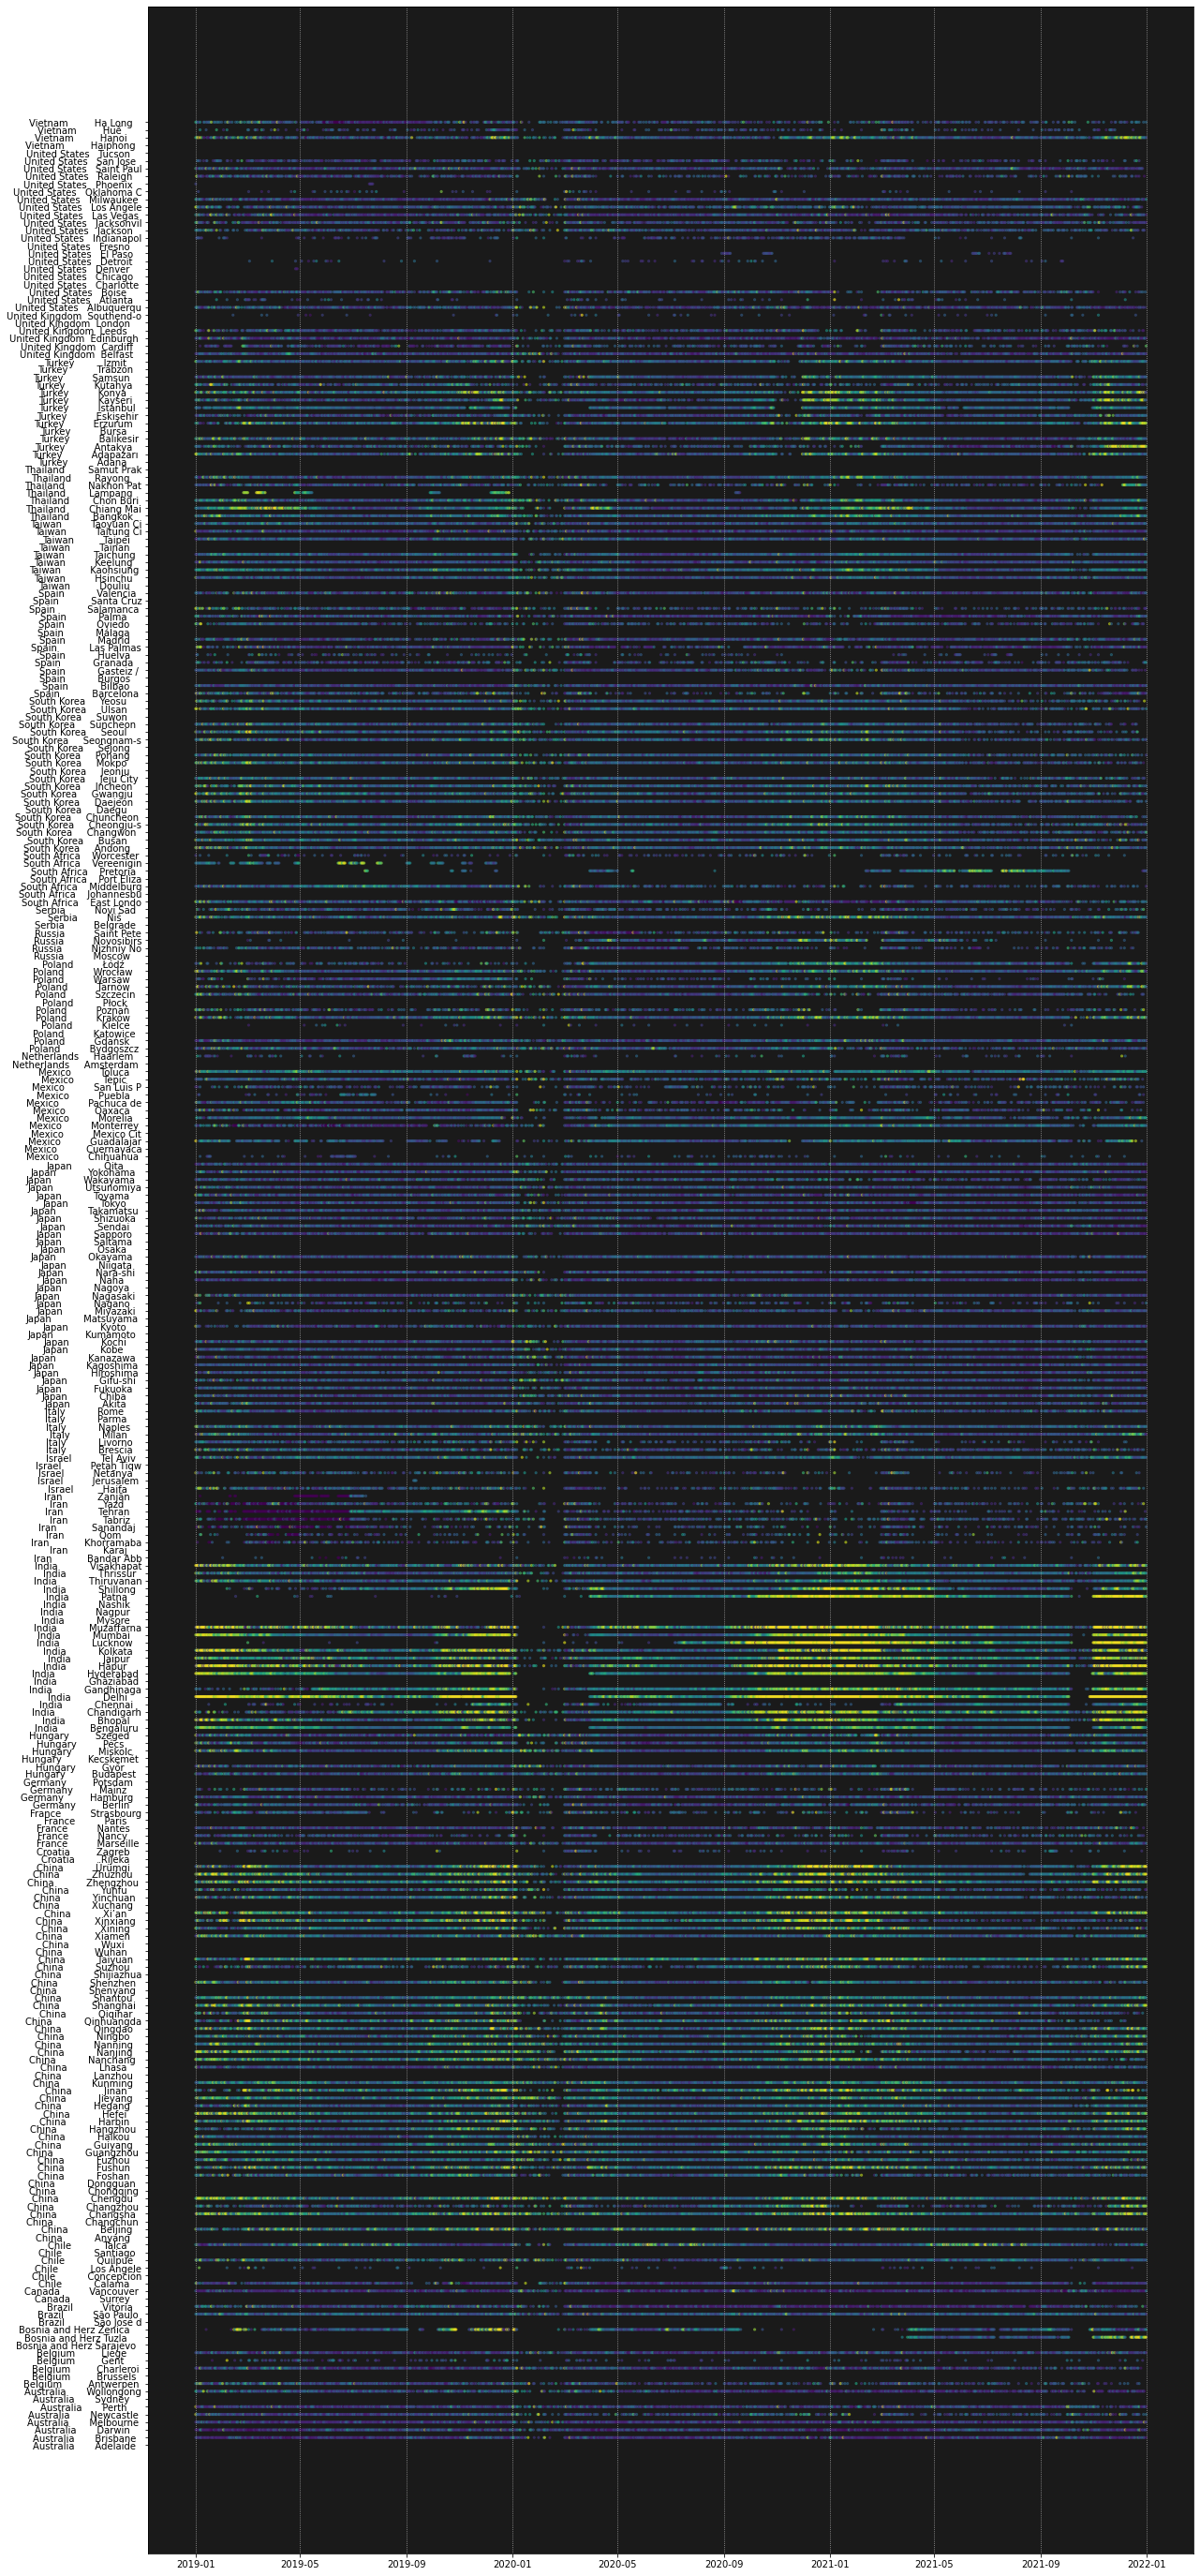

In [ ]:
# use fixed width font to align labels
plt.rcParams['font.family'] = 'Noto Mono'
get_label = lambda x: f"{str(x[0])[:15]:<15} {str(x[1])[:10]:<10}"

fig, ax = plt.subplots(1, 1, figsize=(20, 50))
ax.set_facecolor((0.1, 0.1, 0.1))
ax.grid(axis='x', linestyle=':')

## plot all non-zero PM25
df = pd.concat([df_filled_train, df_filled_test], axis=0).sort_values(COLS_CC + ["timestamp"]).set_index(COLS_CC)
ax.scatter(y=df.index.map(get_label), x=df["timestamp"], c=df["pm25_mid_clip"], s=5, alpha=0.5)

## plot test data as gray points
#df = df_filled_test.set_index(COLS_CC)
#ax.scatter(y=df.index.map(get_label), x=df["timestamp"], c="gray", s=5*(~df["id"].isnull()), alpha=0.5)
